Task 5: Decision Trees and Random Forests

Objective: Learn tree-based models for classification & regression.

Tools: Scikit-learn, Graphviz

## 1.Train a Decision Tree Classifier and visualize the tree.

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("heart.csv")

In [3]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

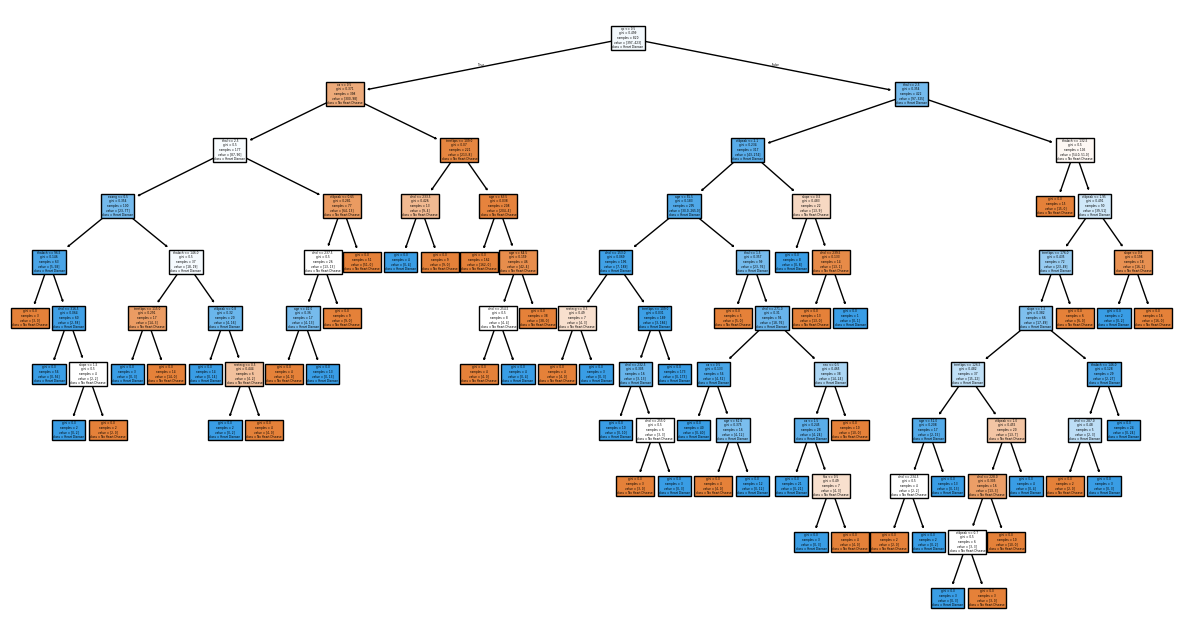

In [6]:
# Visualize the tree
plt.figure(figsize=(15, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Heart Disease', 'Heart Disease'], filled=True)
plt.show()

## 2.Analyze overfitting and control tree depth.

In [7]:
# Train with no depth restriction
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
print("Default Depth Accuracy:", dt_default.score(X_test, y_test))

Default Depth Accuracy: 0.9853658536585366


In [8]:
# Train with restricted depth
dt_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_limited.fit(X_train, y_train)
print("Limited Depth Accuracy:", dt_limited.score(X_test, y_test))

Limited Depth Accuracy: 0.8


##3.Train a Random Forest and compare accuracy.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Decision Tree Accuracy:", dt_limited.score(X_test, y_test))
print("Random Forest Accuracy:", rf.score(X_test, y_test))

Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.9853658536585366


## 4.Interpret feature importances

In [10]:
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature Importances:")
for idx in indices:
    print(f"{X.columns[idx]}: {importances[idx]:.4f}")

Feature Importances:
cp: 0.1351
ca: 0.1273
thalach: 0.1222
oldpeak: 0.1219
thal: 0.1105
age: 0.0779
chol: 0.0748
trestbps: 0.0712
exang: 0.0576
slope: 0.0458
sex: 0.0287
restecg: 0.0186
fbs: 0.0084


## 5.Evaluate using cross-validation.

In [11]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
